In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kordianpiduch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kordianpiduch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('../data/raw/IMDB Dataset.csv')
df.head()

,review,sentiment
0,An excellent cast who do their best with an aw...,negative
1,A dreary and pointless bit of fluff (bloody fl...,negative
2,If the writer/director is reading this (and I ...,negative
3,This is a classic B type movie that you'd rath...,negative
4,A short review but...<br /><br />Avoid at all ...,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27502 entries, 0 to 27501
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     27502 non-null  object
 1   sentiment  27502 non-null  object
dtypes: object(2)
memory usage: 429.8+ KB


In [4]:
df.describe()

,review,sentiment
count,27502,27502
unique,27358,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df['sentiment'].value_counts()

positive    25000
negative     2502
Name: sentiment, dtype: int64

<AxesSubplot:>

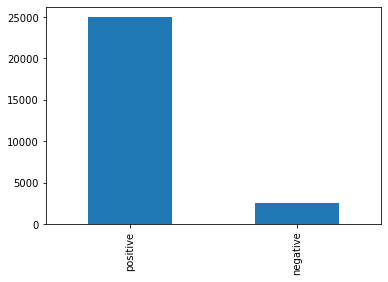

In [6]:
df['sentiment'].value_counts().plot.bar()

IMBALANCED DATASET !!

https://www.section.io/engineering-education/using-imbalanced-learn-to-handle-imbalanced-text-data/#implementing-imbalanced-learn

# Data processing

In [7]:
test_sentence = df['review'][4]
test_sentence

'A short review but...<br /><br />Avoid at all costs, a thorough waste of 90mins. At the end of the film I was none the wiser as to what had actually happened. It\'s full of cameos (Stephen Fry (3mins), Jack Dee (30 secs), the "Philadelphia" girls) and some vaguely recognisable people but it just doesn\'t make any sense. Whether the story just got lost in the edit I don\'t now but jeez...<br /><br />Put on a DVD instead or go to bed and get some rest!!!<br /><br />2 out of 10 (for the cameos and a Morris Minor car chase)<br /><br />'

## Remove non-digit and non-letter parts

In [8]:
def remove_html_tags(sentence: str) -> str:
    soup = BeautifulSoup(sentence, 'html.parser')
    return soup.get_text() 

# test_sentence_html = remove_html_tags(test_sentence)
# print(test_sentence_html)

In [9]:
def remove_non_alphanumeric(sentence: str) -> str:
    # remove non alpha-numeric characters
    sentence = re.sub(r'[^a-zA-Z0-9\s]+', ' ', sentence)
    # replace multiple spaces with one space
    sentence = re.sub(r' +', ' ', sentence)
    return sentence

# test_sentence_alpnum = remove_non_alphanumeric(test_sentence_html)
# print(test_sentence_alpnum)

## Remove stop words (but keep the word 'from')

In [10]:
def remove_stop_words(sentence: str, stop_words: list) -> list:
    word_tokens = nltk.tokenize.word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return filtered_sentence

# custom_stop_words = nltk.corpus.stopwords.words('english')
# try:
#     custom_stop_words.remove('from')
# except:
#     pass

# test_sentence_without_stop_words = remove_stop_words(test_sentence_alpnum, custom_stop_words)
# print(test_sentence_without_stop_words)

## Remove standalone numbers (eg., remove '100' from '100 pieces')

In [11]:
def remove_standalone_numbers(sentence: list) -> list:
    filtered_sentence = [w for w in sentence if not w.isdigit()]
    return filtered_sentence

# test_sentence_without_numbers = remove_standalone_numbers(test_sentence_without_stop_words)
# print(test_sentence_without_numbers)

## Any other text cleaning and standard processing

In [12]:
def sentence_stemmer(sentence: list) -> list:
    porter = nltk.stem.PorterStemmer()
    stemmed_sentence = [porter.stem(w) for w in sentence]
    return stemmed_sentence

# print(sentence_stemmer(test_sentence_without_numbers))

In [13]:
custom_stop_words = nltk.corpus.stopwords.words('english')
try:
    custom_stop_words.remove('from')
except:
    pass

def process_sentence(sentence: str) -> str:
    sentence = remove_html_tags(sentence)
    sentence = remove_non_alphanumeric(sentence)
    sentence = remove_stop_words(sentence, custom_stop_words)
    sentence = remove_standalone_numbers(sentence)
    sentence = sentence_stemmer(sentence)
    return ' '.join(sentence)

In [14]:
df['review'] = df['review'].apply(process_sentence)

/opt/miniconda3/envs/env_equinix/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [15]:
df.head(10)

,review,sentiment
0,excel cast best aw script inept direct worst s...,negative
1,dreari pointless bit fluff bloodi fluff fluff ...,negative
2,writer director read imagin sinc work must tel...,negative
3,classic b type movi rather wast time see start...,negative
4,short review avoid cost thorough wast 90min en...,negative
5,film quit bore snippet nake flesh toss around ...,negative
6,everyth movi bad everyth ridicul haircut ridic...,negative
7,whip minut long review word long three unlik n...,negative
8,ever wonder worst movi ever made stop wonder t...,negative
9,histor accur hmm perhap squint light fall upon...,negative


In [16]:
# df.to_csv('../data/processed/imdb_processed.csv')